In [3]:
# Use this notebook as a template to create popular supervised machine learning models for classification

In [6]:
# Create the sample dataset
import pandas as pd
import numpy as np

ColumnNames=['CIBIL','AGE', 'SALARY', 'APPROVE_LOAN']
DataValues=[[480, 28, 610000, 'Yes'],
            [480, 42, 140000, 'No'],
            [480, 29, 420000, 'No'],
            [490, 30, 420000, 'No'],
            [500, 27, 420000, 'No'],
            [510, 34, 190000, 'No'],
            [550, 24, 330000, 'Yes'],
            [560, 34, 160000, 'Yes'],
            [560, 25, 300000, 'Yes'],
            [570, 34, 450000, 'Yes'],
            [590, 30, 140000, 'Yes'],
            [600, 33, 600000, 'Yes'],
            [600, 22, 400000, 'Yes'],
            [600, 25, 490000, 'Yes'],
            [610, 32, 120000, 'Yes'],
            [630, 29, 360000, 'Yes'],
            [630, 30, 480000, 'Yes'],
            [660, 29, 460000, 'Yes'],
            [700, 32, 470000, 'Yes'],
            [740, 28, 400000, 'Yes']]

# Create the Data Frame
LoanData=pd.DataFrame(data=DataValues,columns=ColumnNames)
LoanData.head()

# Separate Target Variable and Predictor Variables
TargetVariable='APPROVE_LOAN'
Predictors=['CIBIL','AGE', 'SALARY']
X=LoanData[Predictors].values
y=LoanData[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
clf = LogisticRegression(C=1,penalty='l1')

# Printing all the parameters of logistic regression
print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

         No       0.50      1.00      0.67         1
        Yes       1.00      0.67      0.80         3

avg / total       0.88      0.75      0.77         4

[[1 0]
 [1 2]]


,CIBIL,AGE,SALARY,TargetColumn,Prediction
0,480,28,610000,Yes,No
1,660,29,460000,Yes,Yes
2,630,29,360000,Yes,Yes
3,480,42,140000,No,No


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

         No       0.50      1.00      0.67         1
        Yes       1.00      0.67      0.80         3

avg / total       0.88      0.75      0.77         4

[[1 0]
 [1 2]]


,CIBIL,AGE,SALARY,TargetColumn,Prediction
0,480,28,610000,Yes,No
1,660,29,460000,Yes,Yes
2,630,29,360000,Yes,Yes
3,480,42,140000,No,No


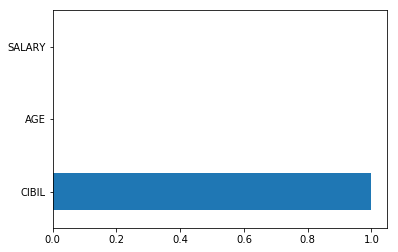

In [10]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
             precision    recall  f1-score   support

         No       0.50      1.00      0.67         1
        Yes       1.00      0.67      0.80         3

avg / total       0.88      0.75      0.77         4

[[1 0]
 [1 2]]


,CIBIL,AGE,SALARY,TargetColumn,Prediction
0,480,28,610000,Yes,No
1,660,29,460000,Yes,Yes
2,630,29,360000,Yes,Yes
3,480,42,140000,No,No


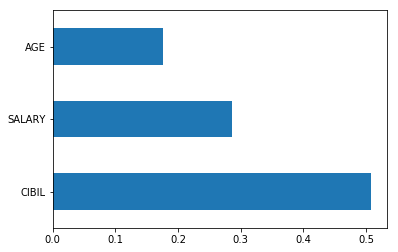

In [11]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=50, random_state=None)
             precision    recall  f1-score   support

         No       0.50      1.00      0.67         1
        Yes       1.00      0.67      0.80         3

avg / total       0.88      0.75      0.77         4

[[1 0]
 [1 2]]


,CIBIL,AGE,SALARY,TargetColumn,Prediction
0,480,28,610000,Yes,No
1,660,29,460000,Yes,Yes
2,630,29,360000,Yes,Yes
3,480,42,140000,No,No


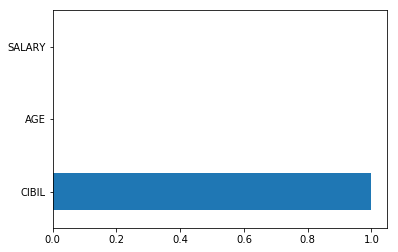

In [28]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DTC ,learning_rate=1)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
             precision    recall  f1-score   support

         No       0.50      1.00      0.67         1
        Yes       1.00      0.67      0.80         3

avg / total       0.88      0.75      0.77         4

[[1 0]
 [1 2]]


,CIBIL,AGE,SALARY,TargetColumn,Prediction
0,480,28,610000,Yes,No
1,660,29,460000,Yes,Yes
2,630,29,360000,Yes,Yes
3,480,42,140000,No,No


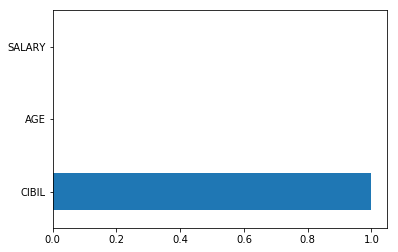

In [29]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

In [20]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
             precision    recall  f1-score   support

         No       0.00      0.00      0.00         1
        Yes       0.75      1.00      0.86         3

avg / total       0.56      0.75      0.64         4

[[0 1]
 [0 3]]


C:\Users\fhashmi\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,CIBIL,AGE,SALARY,TargetColumn,Prediction
0,480,28,610000,Yes,Yes
1,660,29,460000,Yes,Yes
2,630,29,360000,Yes,Yes
3,480,42,140000,No,Yes


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

         No       0.50      1.00      0.67         1
        Yes       1.00      0.67      0.80         3

avg / total       0.88      0.75      0.77         4

[[1 0]
 [1 2]]


,CIBIL,AGE,SALARY,TargetColumn,Prediction
0,480,28,610000,Yes,No
1,660,29,460000,Yes,Yes
2,630,29,360000,Yes,Yes
3,480,42,140000,No,No


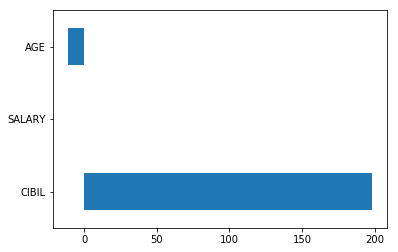

In [27]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='linear')

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()